In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2024-10-06 14:51:44.004393: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-06 14:51:44.037240: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-06 14:51:44.037268: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-06 14:51:44.037988: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-06 14:51:44.045561: I tensorflow/core/platform/cpu_feature_guar

2.15.0


In [2]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-10-06 14:51:45.738844: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-06 14:51:45.766128: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-06 14:51:45.766167: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_virtual_device_configuration(
                gpu,
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])  # Set your memory limit here
    except RuntimeError as e:
        print(e)

In [4]:
# dataset = tf.data.Dataset.load("../datasets/3W/dataset_processed/tf_data/LSTM-Autoencoder/train/2")
# dataset = dataset.unbatch()

## ==============================================

In [5]:
merged_r_e = pd.DataFrame()
rel_r_e = pd.DataFrame()
r_e_path = "../../reconstruction_error/LSTM-Autoencoder-2"

for r_e in os.listdir(r_e_path):
    print(r_e)
    df = pd.read_csv(os.path.join(r_e_path, r_e))
    re_df = df / df.sum() * 100
    merged_r_e = pd.concat([merged_r_e, df])
    rel_r_e = pd.concat([rel_r_e, re_df])

selected_instance_0.csv
selected_instance_4.csv
selected_instance_2.csv


In [6]:
merged_r_e_np = merged_r_e.values
merged_r_e_np = merged_r_e_np.reshape(merged_r_e_np.shape[0])

In [7]:
total_r_e = np.sum(merged_r_e_np)
rel_r_e = np.array([(r / total_r_e) * 100 for r in merged_r_e_np])

In [8]:
print(np.max(merged_r_e_np))
print(np.min(merged_r_e_np))
print(np.median(merged_r_e_np))
print(np.mean(merged_r_e_np))

1.983172680397427
0.0019176296885577
0.9748079635779628
0.8984467238591256


In [9]:
print(np.max(rel_r_e))
print(np.min(rel_r_e))
print(np.median(rel_r_e))
print(np.mean(rel_r_e))

0.00038652545068039825
3.7375095317435393e-07
0.00018999257662893234
0.00017510957481644141


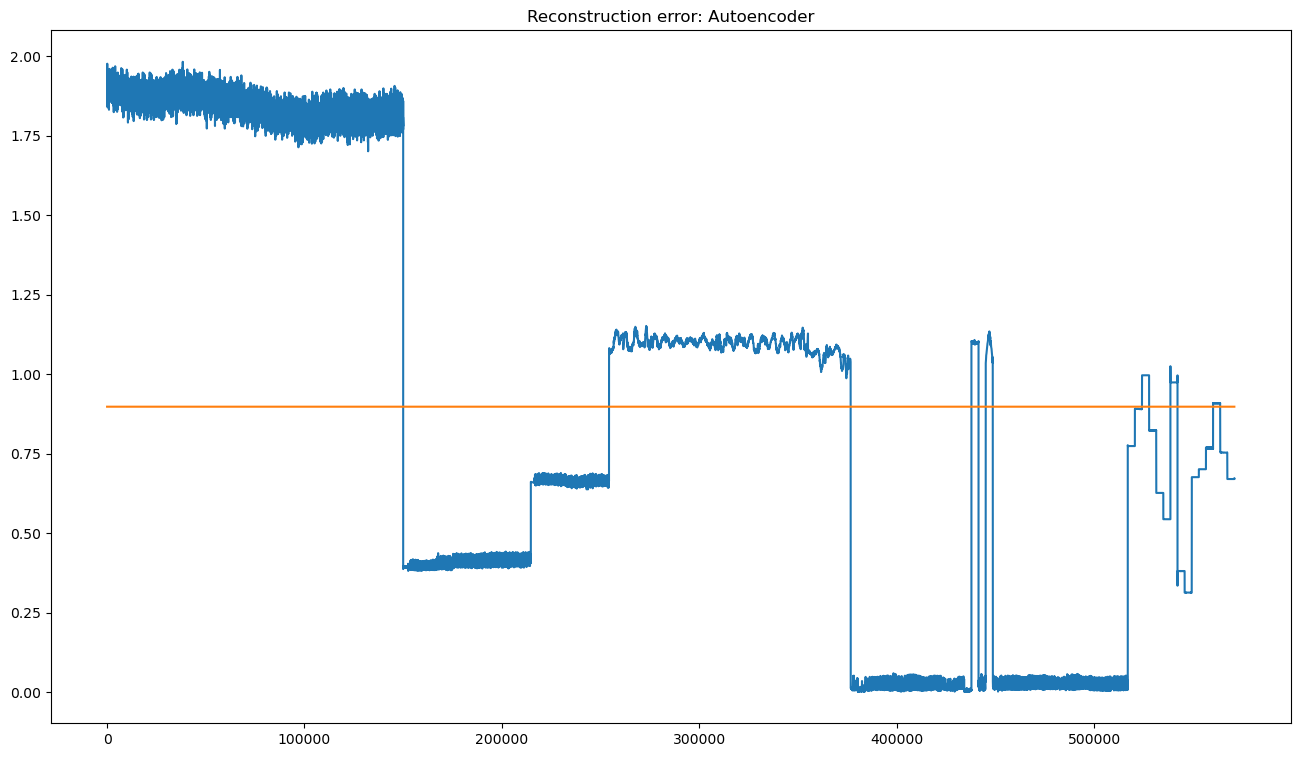

In [10]:
plt.figure(figsize=(16,9))
plt.plot(range(len(merged_r_e)),merged_r_e)
plt.plot(np.full(len(merged_r_e), np.mean(merged_r_e)))
# xmin, xmax, ymin, ymax = plt.axis()
# plt.fill_betweenx(np.linspace(thres-iqr, thres+iqr, 100), r_e.shape[0], color='blue', alpha=0.3)
plt.title("Reconstruction error: Autoencoder")

plt.show()

In [11]:
merged_r_e = pd.DataFrame()
rel_r_e = pd.DataFrame()
r_e_path = "../reconstruction_error/LSTM-GAN"

for r_e in os.listdir(r_e_path):
    df = pd.read_csv(os.path.join(r_e_path, r_e))
    re_df = df / df.sum() * 100
    merged_r_e = pd.concat([merged_r_e, df])
    rel_r_e = pd.concat([rel_r_e, re_df])

In [12]:
merged_r_e_np = merged_r_e.values
merged_r_e_np = merged_r_e_np.reshape(merged_r_e_np.shape[0])

total_r_e = np.sum(merged_r_e_np)
rel_r_e = np.array([(r / total_r_e) * 100 for r in merged_r_e_np])

In [13]:
print(np.max(merged_r_e_np))
print(np.min(merged_r_e_np))
print(np.median(merged_r_e_np))
print(np.mean(merged_r_e_np))
print(np.percentile(merged_r_e_np, 75))

14.754787481850087
0.504167971928583
5.240656774275896
4.53448285788645
6.395205856593323


In [14]:
print(np.max(rel_r_e))
print(np.min(rel_r_e))
print(np.median(rel_r_e))
print(np.mean(rel_r_e))

0.0006716219148726524
2.2949178979410052e-05
0.00023854900941536154
0.00020640473905280874


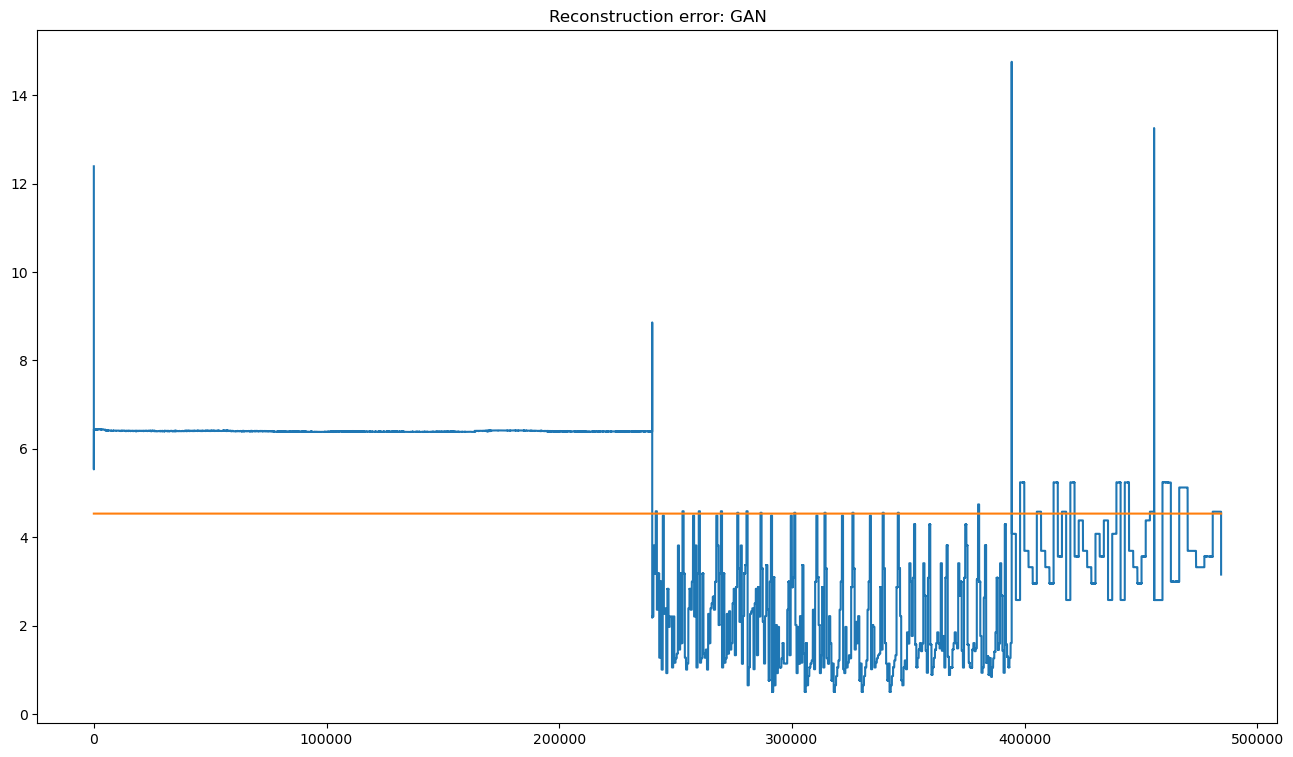

In [15]:
plt.figure(figsize=(16,9))
plt.plot(range(len(merged_r_e)),merged_r_e)
plt.plot(np.full(len(merged_r_e), np.mean(merged_r_e)))
# xmin, xmax, ymin, ymax = plt.axis()
# plt.fill_betweenx(np.linspace(thres-iqr, thres+iqr, 100), r_e.shape[0], color='blue', alpha=0.3)
plt.title("Reconstruction error: GAN")

plt.show()

## =============================================

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from menelaus.data_drift.cdbd import CDBD
from menelaus.data_drift.hdddm import HDDDM
from menelaus.data_drift import PCACD
from menelaus.data_drift import KdqTreeStreaming, KdqTreeBatch
from menelaus.data_drift import NNDVI
from menelaus.datasets import make_example_batch_data, fetch_circle_data

In [14]:
circle_data = fetch_circle_data()

In [6]:
sample_test = pd.read_parquet("../datasets/3W/dataset/0/WELL-00006_20170507120135.parquet")
sample_test = sample_test[['T-TPT','P-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-PDG', 'class']]

sample_test = pd.concat([sample_test, pd.read_parquet("../datasets/3W/dataset/5/SIMULATED_00001.parquet")[['T-TPT','P-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-PDG', 'class']]])

sample_test = sample_test.reset_index()[['T-TPT','P-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-PDG', 'class']]

<Figure size 2000x600 with 0 Axes>

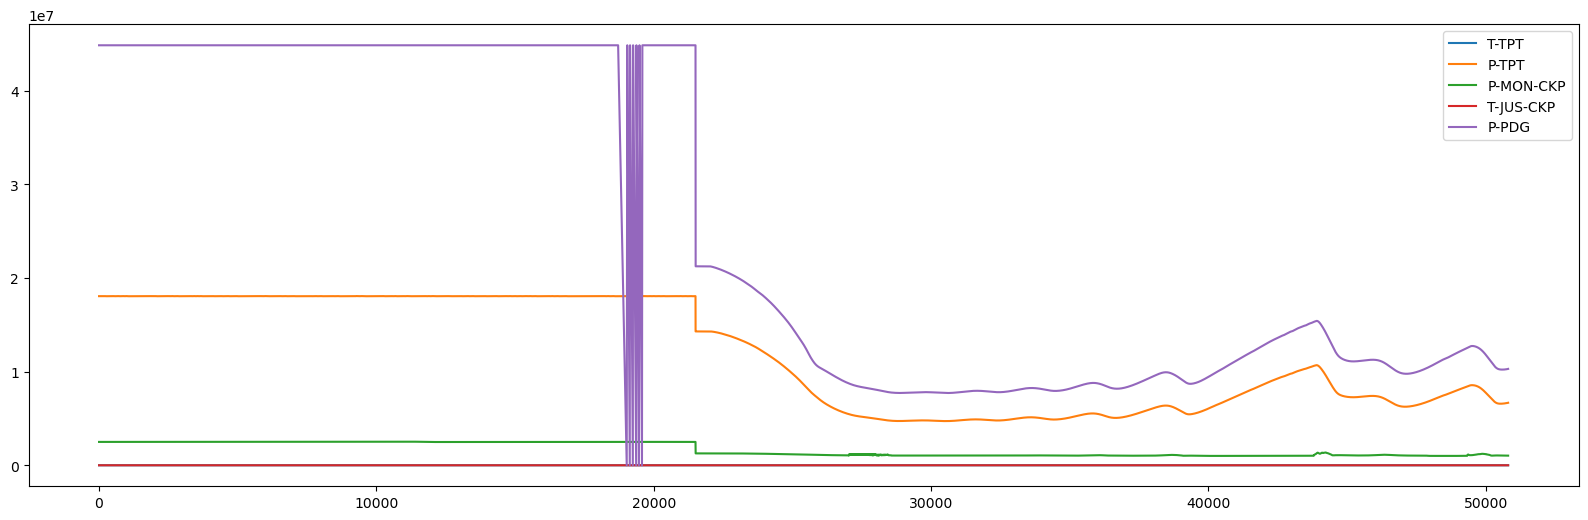

In [7]:
plt.figure(figsize=(20, 6))
sample_test[['T-TPT','P-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-PDG']].plot(figsize=(20,6))
plt.show()

In [60]:
np.random.seed(1)

In [8]:
# Note that the default input_type for KDQTree is "stream".
# The window size, corresponding to the portion of the stream which KDQTree
# monitors, must be specified.
det = KdqTreeStreaming(window_size=1000, alpha=0.05, bootstrap_samples=1000, count_ubound=50)

# setup DF to record results
status = pd.DataFrame(columns=["index", 'T-TPT','P-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-PDG', "drift_detected"])

# iterate through X data and run detector
data = sample_test[['T-TPT','P-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-PDG']]

In [62]:
len(data)

50805

In [63]:
plot_data = {}
for i in range(len(data)):
    det.update(data.iloc[[i]])
    status.loc[i] = [i, data.iloc[i, 0], data.iloc[i, 1], data.iloc[i, 2], data.iloc[i, 3], data.iloc[i, 4], det.drift_state]
    if det.drift_state is not None:
        # capture the visualization data
        plot_data[i] = det.to_plotly_dataframe()

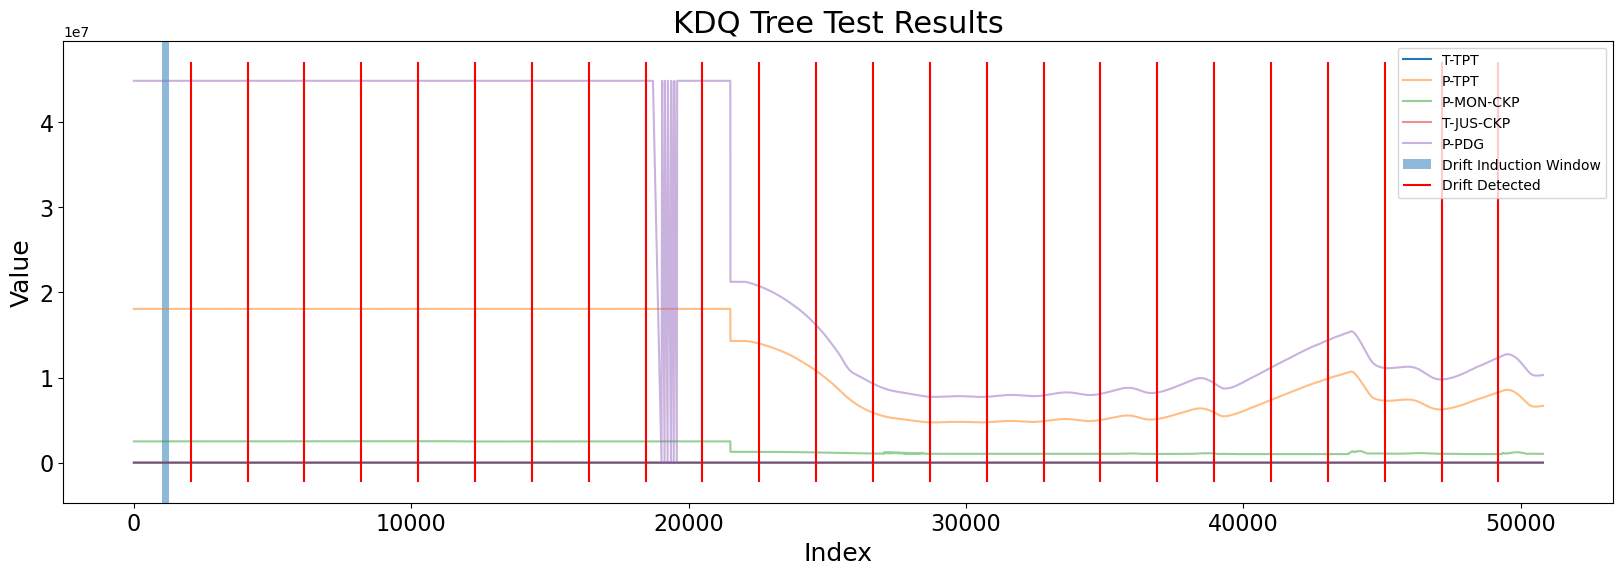

In [64]:
plt.figure(figsize=(20, 6))
plt.plot("index", "T-TPT", data=status, label="T-TPT")
plt.plot("index", "P-TPT", data=status, label="P-TPT", alpha=0.5)
plt.plot("index", "P-MON-CKP", data=status, label="P-MON-CKP", alpha=0.5)
plt.plot("index", "T-JUS-CKP", data=status, label="T-JUS-CKP", alpha=0.5)
plt.plot("index", "P-PDG", data=status, label="P-PDG", alpha=0.5)
plt.grid(False, axis="x")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("KDQ Tree Test Results", fontsize=22)
plt.ylabel("Value", fontsize=18)
plt.xlabel("Index", fontsize=18)

xmin, xmax, ymin, ymax = plt.axis()

drift_start, drift_end = 1000, 1250
plt.axvspan(drift_start, drift_end, alpha=0.5, label="Drift Induction Window")

# Draw red lines that indicate where drift was detected
plt.vlines(
    x=status.loc[status["drift_detected"] == "drift"]["index"],
    ymin=ymin,
    ymax=ymax,
    label="Drift Detected",
    color="red",
)

plt.legend()
plt.show()

In [73]:
from scipy.special import rel_entr
from scipy.stats import wasserstein_distance

kl_div = sum(rel_entr(data.loc[:19000,:].values, data.loc[30000:35000, :].values))
# if kl_div > threshold:
#     print("Data distribution drift detected")

In [23]:
import numpy as np
from scipy.spatial import KDTree
from scipy.special import rel_entr

# Generate bin counts for the partitioned data using histograms
def compute_bin_counts(data, num_bins=10):
    # Compute histograms for the data
    hist, _ = np.histogramdd(data, bins=num_bins)
    return hist.flatten()  # Flatten the histogram to get bin counts

# KL Divergence Calculation between reference and incoming data
def kl_divergence(p, q):
    # Ensure that p and q are proper probability distributions (sum to 1)
    p = np.asarray(p, dtype=np.float32)
    q = np.asarray(q, dtype=np.float32)
    
    p /= np.sum(p)
    q /= np.sum(q)
    
    # Avoid division by zero
    q = np.where(q == 0, 1e-10, q)
    p = np.where(p == 0, 1e-10, p)
    
    return np.sum(rel_entr(p, q))

# Perform bootstrap hypothesis testing
def perform_bootstrap(ref_data, incoming_data, num_bootstrap_samples=1000, num_bins=10):
    ref_counts = compute_bin_counts(ref_data, num_bins=num_bins)
    inc_counts = compute_bin_counts(incoming_data, num_bins=num_bins)
    
    # Compute actual KL divergence
    kl_div = kl_divergence(ref_counts, inc_counts)
    
    # Bootstrap resampling
    bootstrap_kl_divs = []
    combined_data = np.vstack([ref_data, incoming_data])
    
    for _ in range(num_bootstrap_samples):
        bootstrap_sample = combined_data[np.random.choice(combined_data.shape[0], size=combined_data.shape[0], replace=True)]
        bootstrap_ref, bootstrap_inc = np.split(bootstrap_sample, 2)
        bootstrap_ref_counts = compute_bin_counts(bootstrap_ref, num_bins=num_bins)
        bootstrap_inc_counts = compute_bin_counts(bootstrap_inc, num_bins=num_bins)
        bootstrap_kl = kl_divergence(bootstrap_ref_counts, bootstrap_inc_counts)
        bootstrap_kl_divs.append(bootstrap_kl)
    
    # Calculate p-value (proportion of bootstrap samples greater than the actual KL divergence)
    p_value = np.sum(np.array(bootstrap_kl_divs) >= kl_div) / num_bootstrap_samples
    return kl_div, p_value

# Simulated Data
np.random.seed(42)
reference_data = data.loc[30000:35000, :].values  # Reference (historical) data
incoming_data = data.loc[35000:35100, :].values  # Incoming (new) data

# Perform ITA-based drift detection
kl_div, p_value = perform_bootstrap(reference_data, incoming_data)

# Output the results
alpha = 0.05  # Significance level
print(f"KL Divergence: {kl_div}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Concept drift detected!")
else:
    print("No concept drift detected.")


KL Divergence: 18.661073684692383
P-value: 0.0
Concept drift detected!


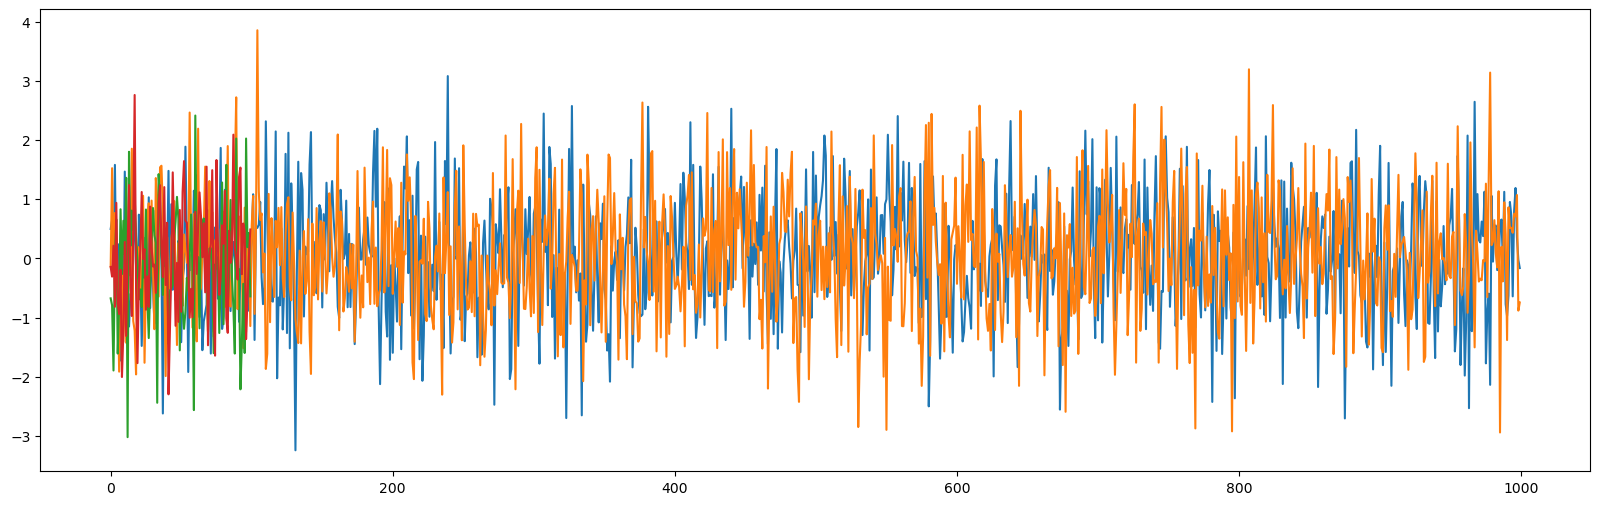

In [21]:
plt.figure(figsize=(20,6))
plt.plot(reference_data)
plt.plot(incoming_data)
plt.show()

In [ ]:
# import numpy as np
# import pandas as pd
# from scipy.stats import entropy
# from sklearn.utils import resample

# def partition_data(reference_data, incoming_data, num_bins=10):
#     # Define the bin edges based on the reference and incoming data combined
#     combined_data = np.concatenate([reference_data, incoming_data])
#     bin_edges = np.linspace(combined_data.min(), combined_data.max(), num_bins + 1)
    
#     # Partition the data into bins
#     ref_hist, _ = np.histogram(reference_data, bins=bin_edges)
#     new_hist, _ = np.histogram(incoming_data, bins=bin_edges)
    
#     # Convert to probability distributions
#     P_ref = ref_hist / np.sum(ref_hist)
#     P_new = new_hist / np.sum(new_hist)
    
#     return P_ref, P_new

# def calculate_kl_divergence(P_ref, P_new):
#     # Avoid division by zero by replacing zero probabilities with a small value
#     epsilon = 1e-10
#     P_ref = np.clip(P_ref, epsilon, None)
#     P_new = np.clip(P_new, epsilon, None)
    
#     # Calculate KL Divergence
#     D_KL = np.sum(P_ref * np.log(P_ref / P_new))
    
#     return D_KL

# def bootstrap_kl_divergence(reference_data, incoming_data, num_bins=10, n_bootstrap=1000):
#     combined_data = np.concatenate([reference_data, incoming_data])
#     bootstrap_kl_values = []
    
#     for _ in range(n_bootstrap):
#         # Resample with replacement
#         bootstrap_sample = resample(combined_data, n_samples=len(combined_data))
#         # Split into reference and new data
#         bootstrap_ref = bootstrap_sample[:len(reference_data)]
#         bootstrap_new = bootstrap_sample[len(reference_data):]
        
#         # Partition and calculate KL divergence for the bootstrap sample
#         P_ref_boot, P_new_boot = partition_data(bootstrap_ref, bootstrap_new, num_bins)
#         D_KL_boot = calculate_kl_divergence(P_ref_boot, P_new_boot)
#         bootstrap_kl_values.append(D_KL_boot)
    
#     return np.array(bootstrap_kl_values)

# def calculate_p_value(D_KL, bootstrap_kl_values):
#     # Calculate the proportion of bootstrap KL values greater than or equal to the original D_KL
#     p_value = np.mean(bootstrap_kl_values >= D_KL)
#     return p_value

# def detect_drift(reference_data, incoming_data, alpha=0.05, num_bins=10, n_bootstrap=1000):
#     # Step 1: Partition the reference and incoming data into bins
#     P_ref, P_new = partition_data(reference_data, incoming_data, num_bins)
    
#     # Step 2: Calculate the original KL Divergence
#     D_KL = calculate_kl_divergence(P_ref, P_new)
    
#     # Step 3: Perform bootstrapping
#     bootstrap_kl_values = bootstrap_kl_divergence(reference_data, incoming_data, num_bins, n_bootstrap)
    
#     # Step 4: Calculate the p-value
#     p_value = calculate_p_value(D_KL, bootstrap_kl_values)
    
#     # Step 5: Check if drift is detected
#     if p_value < alpha:
#         print(f"Drift detected. p-value: {p_value:.5f} < alpha: {alpha}")
#         return True  # Model retraining can be triggered here
#     else:
#         print(f"No drift detected. p-value: {p_value:.5f} >= alpha: {alpha}")
#         return False

# # Example usage
# reference_data = np.random.normal(loc=0, scale=1, size=1000)
# incoming_data = np.random.normal(loc=0.5, scale=1, size=1000)

# detect_drift(reference_data, incoming_data, alpha=0.05, num_bins=10, n_bootstrap=1000)


In [9]:
import numpy as np
import math

class ADWIN:
    def __init__(self, delta=0.05):
        """
        Initialize the ADWIN algorithm.
        delta: Confidence parameter that controls the sensitivity of drift detection.
        """
        self.delta = delta
        self.window = []

    def add_element(self, value):
        """
        Add a new element to the sliding window and detect drift if it occurs.
        """
        self.window.append(value)
        return self.detect_drift()

    def detect_drift(self):
        """
        Detect concept drift by splitting the window into two subwindows and comparing their means.
        Shrinks the window if drift is detected.
        Returns True if drift is detected, False otherwise.
        """
        # Initially, no drift is detected.
        drift_detected = False
        
        # Start checking with the full window size.
        W = len(self.window)
        
        # Loop to check every possible split point for subwindows.
        for i in range(1, W):
            W1 = self.window[:i]  # Old data (subwindow 1)
            W2 = self.window[i:]   # New data (subwindow 2)

            # Calculate means of W1 and W2
            mu_W1 = np.mean(W1)
            mu_W2 = np.mean(W2)
            
            # Calculate the difference between the means
            delta_mu = abs(mu_W1 - mu_W2)

            # Calculate the combined standard error
            m = (1 / len(W1) + 1 / len(W2))
            epsilon_t = math.sqrt(m / 2 * math.log(2 / self.delta))

            # If the difference in means exceeds the threshold, drift is detected
            if delta_mu > epsilon_t:
                drift_detected = True
                self.window = W2  # Shrink the window by keeping only W2 (recent data)
                break

        return drift_detected

# Example usage
adwin = ADWIN(delta=0.05)

# Simulated data stream with drift
data_stream = np.concatenate([np.random.normal(0, 1, (1500, 2)), np.random.normal(2, 1, (500,2))])

drift_points = []

for i, value in enumerate(data_stream):
    if adwin.add_element(value):
        print(f"Drift detected at index {i}")
        drift_points.append(i)


Drift detected at index 25
Drift detected at index 27
Drift detected at index 42
Drift detected at index 43
Drift detected at index 45
Drift detected at index 49
Drift detected at index 53
Drift detected at index 82
Drift detected at index 86
Drift detected at index 94
Drift detected at index 99
Drift detected at index 115
Drift detected at index 118
Drift detected at index 142
Drift detected at index 143
Drift detected at index 151
Drift detected at index 161
Drift detected at index 166
Drift detected at index 187
Drift detected at index 191
Drift detected at index 195
Drift detected at index 208
Drift detected at index 237
Drift detected at index 239
Drift detected at index 260
Drift detected at index 265
Drift detected at index 272
Drift detected at index 276
Drift detected at index 284
Drift detected at index 293
Drift detected at index 343
Drift detected at index 365
Drift detected at index 373
Drift detected at index 378
Drift detected at index 389
Drift detected at index 400
Dri

In [2]:
import random
rng = random.Random(12345)

data_stream = rng.choices([0, 1], k=1000) + rng.choices(range(4, 8), k=1000)

In [1]:
import pandas as pd

sample_test = pd.read_parquet("../datasets/3W/dataset/1/SIMULATED_00095.parquet")
sample_test = sample_test[['T-TPT','P-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-PDG', 'class']]

# Scale pressure columns (those starting with 'P') by 10^6
pressure_columns = [col for col in sample_test.columns if col.startswith('P')]
sample_test[pressure_columns] = sample_test[pressure_columns] / 10**6   

# sample_test = pd.read_csv('../../datasets/3W/dataset_processed/csv/2/WELL-00011_20141006150121.csv', index_col='timestamp')
# sample_test.dropna(inplace=True)
sample_test['class'].fillna(value=0, inplace=True) 
sample_test_class = sample_test['class']
sample_test_np = sample_test.drop('class',axis=1).values

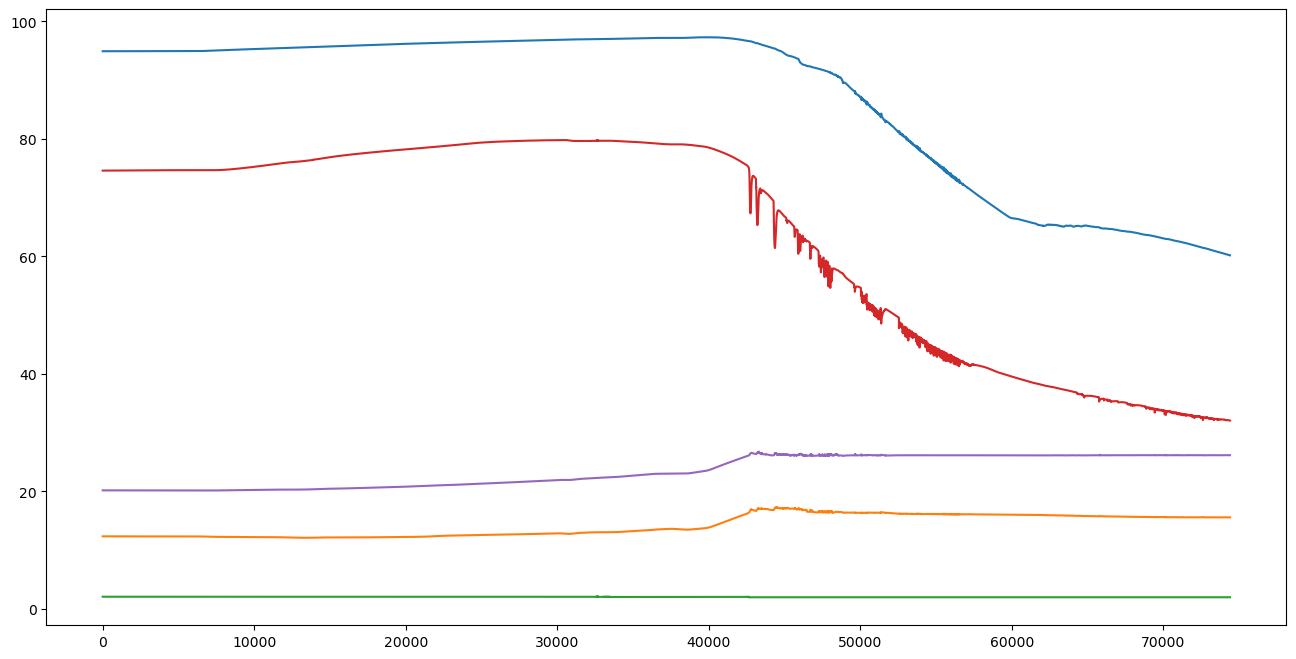

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(range(len(sample_test_np)),sample_test_np)
plt.show()

In [3]:
sample_test_np[:,]

array([[94.9176204, 12.36711  ,  2.093709 , 74.6018508, 20.19286  ],
       [94.91763  , 12.3671096,  2.093709 , 74.6018708, 20.19286  ],
       [94.9176304, 12.3671   ,  2.093709 , 74.6018912, 20.19286  ],
       ...,
       [60.185865 , 15.597461 ,  2.0014389, 32.079769 , 26.175211 ],
       [60.185106 , 15.59756  ,  2.0014399, 32.078559 , 26.175283 ],
       [60.184346 , 15.597642 ,  2.00144  , 32.077477 , 26.175353 ]])

In [2]:
import numpy as np

sample_test_np = np.concatenate((np.random.normal(loc=1.2, scale=1.0, size=10000), np.random.normal(loc=1.5, scale=1.0, size=10000)))

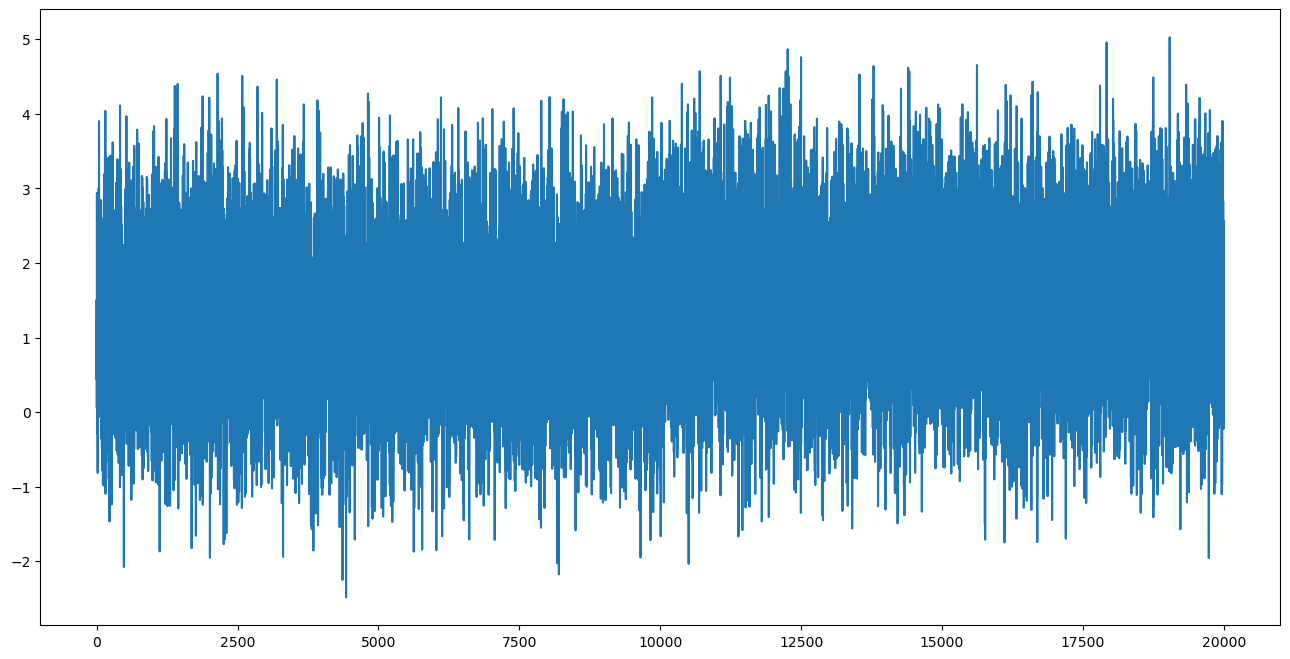

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(range(len(sample_test_np)),sample_test_np)
plt.show()

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
aggregated_column = pca.fit_transform(sample_test_np)

In [25]:
pca.explained_variance_ratio_

array([0.98109884])

In [13]:
from scipy.stats import gmean

aggregated_column = gmean(sample_test_np, axis=1).reshape(-1, 1)

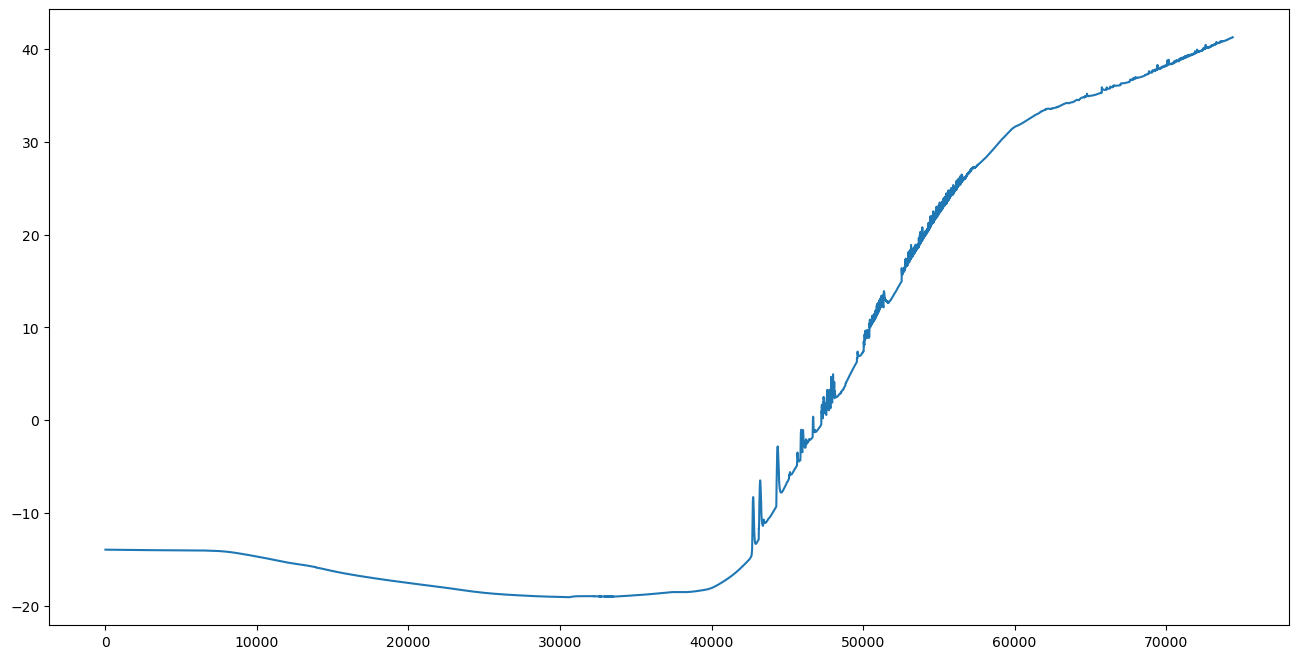

In [26]:
plt.figure(figsize=(16,8))
plt.plot(range(len(aggregated_column)),aggregated_column)
plt.show()

In [5]:
from river import drift


c_index = []

for i, val in enumerate(sample_test_np.T):
    adwin = drift.ADWIN(grace_period=600, min_window_length=600, clock=600, delta=0.0005, max_buckets=50)
    for j, v in enumerate(val):
        adwin.update(v)
        if adwin.drift_detected:
            print(f"Change detected at index {i},{j}, input value: {v}")
            c_index.append(j)

Change detected at index 0,4799, input value: 94.93965
Change detected at index 0,7799, input value: 95.07863400000001
Change detected at index 0,9599, input value: 95.2547236
Change detected at index 0,11399, input value: 95.4234336
Change detected at index 0,13199, input value: 95.5839144
Change detected at index 0,14999, input value: 95.7560532
Change detected at index 0,16799, input value: 95.9118436
Change detected at index 0,18599, input value: 96.06388319999999
Change detected at index 0,20399, input value: 96.2108032
Change detected at index 0,22199, input value: 96.3601324
Change detected at index 0,24599, input value: 96.50790280000001
Change detected at index 0,26999, input value: 96.6657828
Change detected at index 0,29399, input value: 96.8116224
Change detected at index 0,31799, input value: 96.9489612
Change detected at index 0,34199, input value: 97.05527239999999
Change detected at index 0,36599, input value: 97.1843892
Change detected at index 0,39599, input value: 97

In [54]:
import numpy as np

sample_test_np = np.concatenate((
    np.random.normal(loc=1.2, scale=1.0, size=10000), 
    np.random.normal(loc=1.341, scale=1.0, size=10000), 
    np.random.normal(loc=1.2, scale=1.0, size=10000)))

In [55]:
from river import drift

adwin1 = drift.ADWIN(grace_period=600, min_window_length=100, clock=600, delta=5e-15, max_buckets=10)
c_index_0 = []
for i, val in enumerate(sample_test_np):
    adwin1.update(val)
    if adwin1.drift_detected:
        print(f"Change detected at index {i}, input value: {val}")
        c_index_0.append(i)

Change detected at index 18599, input value: 0.0689862167129538


In [56]:
adwin1.variance

11510.230780713298

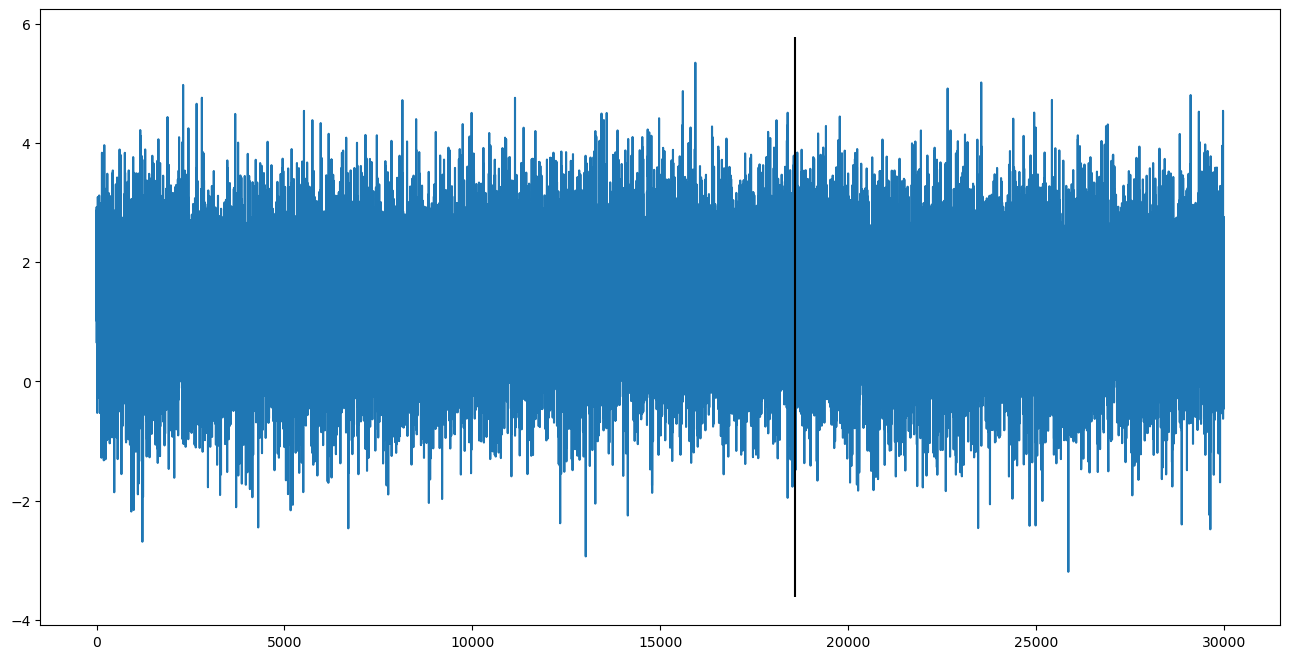

In [57]:
plt.figure(figsize=(16,8))
plt.plot(range(len(sample_test_np)),sample_test_np)
xmin, xmax, ymin, ymax = plt.axis()
plt.vlines(
    x=c_index_0,
    ymin=ymin,
    ymax=ymax,
    color='black'
)
plt.show()

In [37]:
ph = drift.PageHinkley(min_instances=600)

c_index_1 = []
for i, val in enumerate(sample_test_np[:,0]):
    ph.update(val)
    if ph.drift_detected:
        print(f"Change detected at index {i}, input value: {val}")
        c_index_1.append(i)

Change detected at index 7316, input value: 95.026454
Change detected at index 8843, input value: 95.182944
Change detected at index 10447, input value: 95.3362744
Change detected at index 12095, input value: 95.4840036
Change detected at index 13707, input value: 95.6346936
Change detected at index 15323, input value: 95.7826236
Change detected at index 16985, input value: 95.9278036
Change detected at index 18684, input value: 96.0709232
Change detected at index 20413, input value: 96.2119232
Change detected at index 22092, input value: 96.3532728
Change detected at index 24153, input value: 96.4773124
Change detected at index 26086, input value: 96.6059828
Change detected at index 28062, input value: 96.7315824
Change detected at index 30121, input value: 96.8521616
Change detected at index 32042, input value: 96.9585716
Change detected at index 34491, input value: 97.0689508
Change detected at index 36562, input value: 97.1841804
Change detected at index 39498, input value: 97.2866

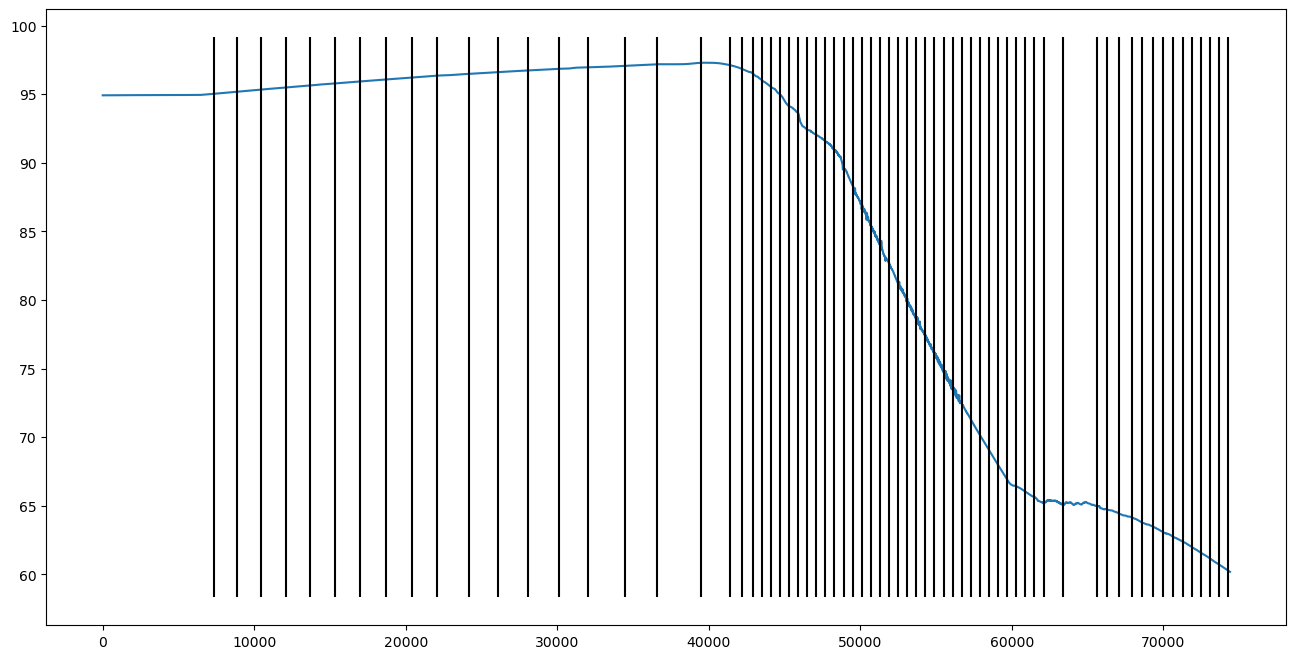

In [38]:
plt.figure(figsize=(16,8))
plt.plot(range(len(sample_test_np)),sample_test_np[:,0])
xmin, xmax, ymin, ymax = plt.axis()
plt.vlines(
    x=c_index_1,
    ymin=ymin,
    ymax=ymax,
    color='black'
)
plt.show()